# Clasificación: Predecir si un estudiante tuvo una oferta laboral o no

1. Preparación de Datos (Ya se realizo en el notebook Calidad_de_datos_Placement)
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, SVM, RandomForest
4. Evaluación del Modelo: matriz de confusion, P,R, ROC
5. Guardar el modelo

hiperparametrizado con gridSearch


El despliegue se realiza en otro jupyter_notebook

El objetivo del modelo predictivo es anticipar si un estudiante será colocado en una oferta laboral durante el proceso de reclutamiento en el campus, utilizando variables como rendimiento académico, especialización, experiencia laboral y otros factores personales.

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
#Cargamos los datos
data = pd.read_excel("datos_preparados.xlsx")
data.head()

,Unnamed: 0,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,0,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,1,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,2,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,3,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,4,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [3]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      296 non-null    int64  
 1   gender          296 non-null    object 
 2   ssc_p           296 non-null    float64
 3   hsc_p           296 non-null    float64
 4   degree_p        296 non-null    float64
 5   workex          296 non-null    object 
 6   etest_p         296 non-null    float64
 7   specialisation  296 non-null    object 
 8   mba_p           296 non-null    float64
 9   status          296 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 23.3+ KB


In [4]:
#Corrección de variables categóricas
data['gender']=data['gender'].astype('category')
data['workex']=data['workex'].astype('category')
data['specialisation']=data['specialisation'].astype('category')
data['status']=data['status'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      296 non-null    int64   
 1   gender          296 non-null    category
 2   ssc_p           296 non-null    float64 
 3   hsc_p           296 non-null    float64 
 4   degree_p        296 non-null    float64 
 5   workex          296 non-null    category
 6   etest_p         296 non-null    float64 
 7   specialisation  296 non-null    category
 8   mba_p           296 non-null    float64 
 9   status          296 non-null    category
dtypes: category(4), float64(5), int64(1)
memory usage: 15.6 KB


<Axes: xlabel='specialisation'>

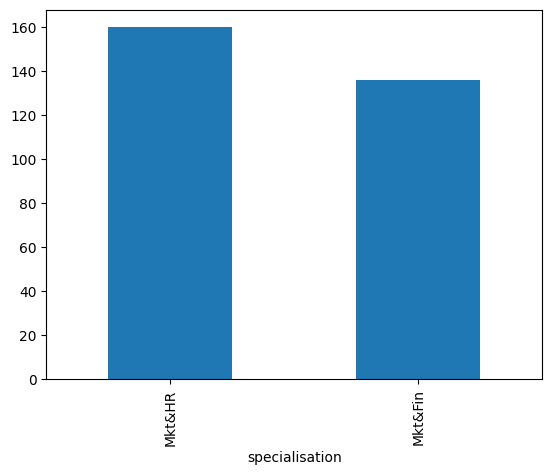

In [5]:
#Descripción de la variable para visualizar mejor si tiene 2 o más categorias
data['specialisation'].value_counts().plot(kind='bar')

In [6]:
#Se crean dummies a las variables predictoras categóricas (no a la variable obj)
data = pd.get_dummies(data, columns=['gender'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['workex'], drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['specialisation'], drop_first=True, dtype=int)
data.head()

,Unnamed: 0,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_M,workex_Yes,specialisation_Mkt&HR
0,0,67.00,91.00,58.00,55.0,58.80,Placed,1,0,1
1,1,79.33,78.33,77.48,86.5,66.28,Placed,1,1,0
2,2,65.00,68.00,64.00,75.0,57.80,Placed,1,0,0
3,3,56.00,52.00,52.00,66.0,59.43,Not Placed,1,0,1
4,4,85.80,73.60,73.30,96.8,55.50,Placed,1,0,0


In [7]:
#Se codifican las categorias de la VARIABLE OBJETIVO con Labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["status"]=labelencoder.fit_transform(data["status"]) #Objetivo

data.head()

,Unnamed: 0,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_M,workex_Yes,specialisation_Mkt&HR
0,0,67.00,91.00,58.00,55.0,58.80,1,1,0,1
1,1,79.33,78.33,77.48,86.5,66.28,1,1,1,0
2,2,65.00,68.00,64.00,75.0,57.80,1,1,0,0
3,3,56.00,52.00,52.00,66.0,59.43,0,1,0,1
4,4,85.80,73.60,73.30,96.8,55.50,1,1,0,0


# 2. División 70-30


<Axes: xlabel='status'>

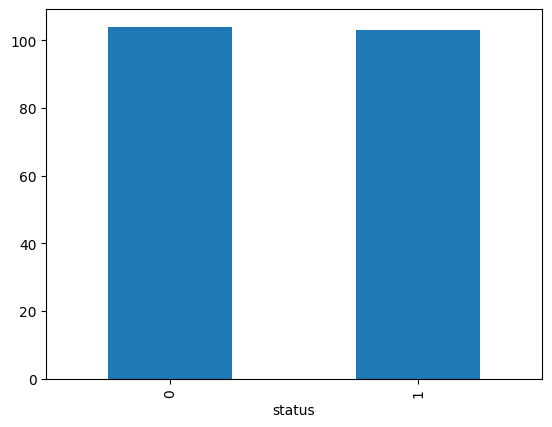

In [8]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("status", axis = 1) # Variables predictoras
Y = data['status'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado (cuando la variable es una categoria (solo aca), me siga el mismo patron de cantidad tanto en test como en train)
Y_train.value_counts().plot(kind='bar')

<Axes: xlabel='status'>

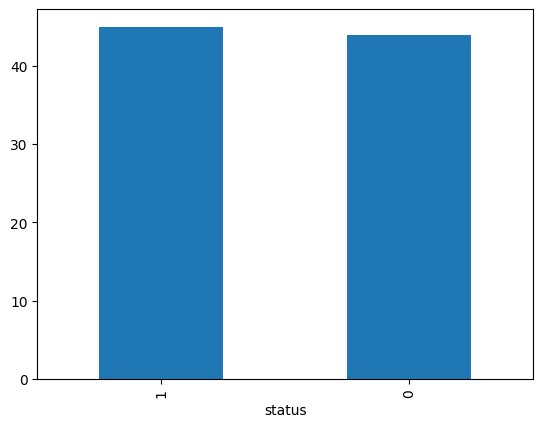

In [9]:
#Variable objetivo del 30%
Y_test.value_counts().plot(kind='bar')

# 3. Aprendizaje con el 70% y Evaluación con el 30%

# **Tree**
Transformacion: discretizar, el algoritmo lo puede hacer. **No se normaliza**


In [10]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegressor

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(min_samples_leaf=2)

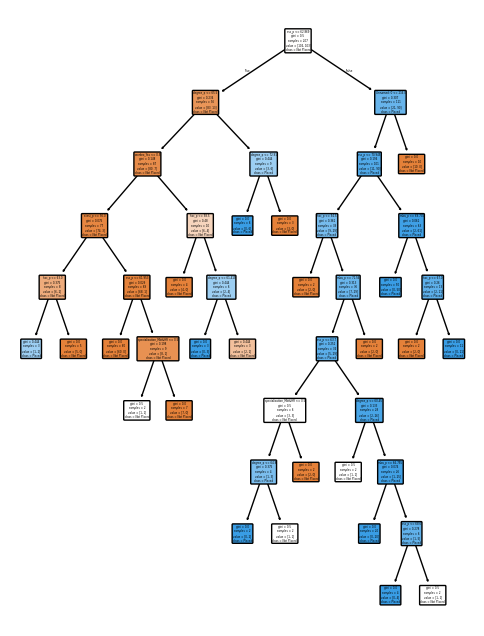

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8)) #Tamaño de la imagen
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [12]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1
 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1]


In [13]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.7640449438202247


In [14]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

array([[36,  8],
       [13, 32]])

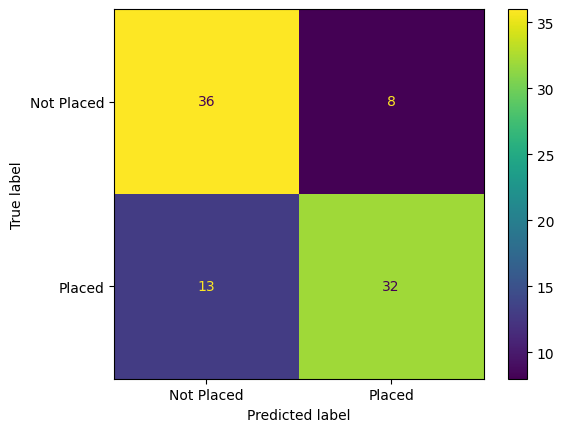

In [15]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

In [16]:
#Precision, Recall, f1, exactitud (REPORTE COMPLETO)
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

  Not Placed       0.73      0.82      0.77        44
      Placed       0.80      0.71      0.75        45

    accuracy                           0.76        89
   macro avg       0.77      0.76      0.76        89
weighted avg       0.77      0.76      0.76        89



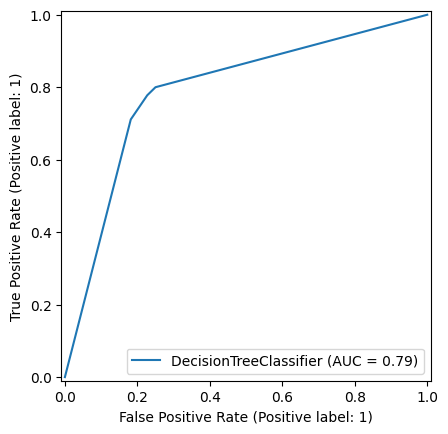

In [17]:
metrics.RocCurveDisplay.from_estimator(modelTree,X_test, Y_test)

# **Random Forest**

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2) #max debe estar entre el 60-90%
model_rf.fit(X_train, Y_train) #70%

RandomForestClassifier(max_samples=0.7, min_samples_leaf=2)

              precision    recall  f1-score   support

  Not Placed       0.86      0.86      0.86        44
      Placed       0.87      0.87      0.87        45

    accuracy                           0.87        89
   macro avg       0.87      0.87      0.87        89
weighted avg       0.87      0.87      0.87        89



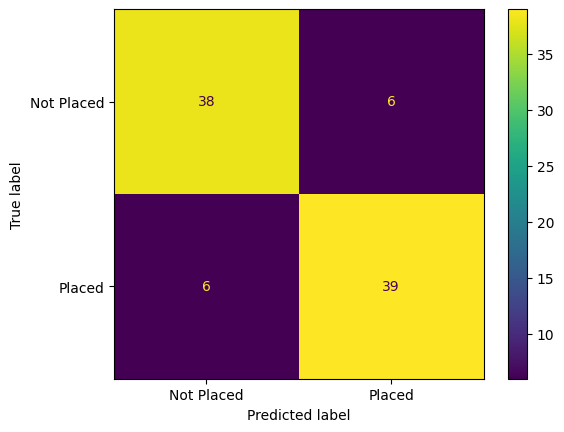

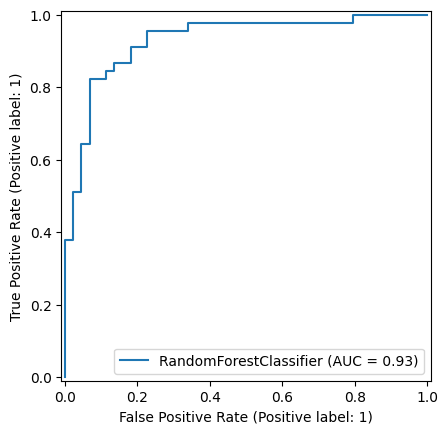

In [21]:
#Evaluación de RandomForest con 30%
from sklearn import metrics

Y_pred = model_rf.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(model_rf,X_test, Y_test)

# **KNN**
* Normalización

In [22]:
data.head()

,Unnamed: 0,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_M,workex_Yes,specialisation_Mkt&HR
0,0,67.00,91.00,58.00,55.0,58.80,1,1,0,1
1,1,79.33,78.33,77.48,86.5,66.28,1,1,1,0
2,2,65.00,68.00,64.00,75.0,57.80,1,1,0,0
3,3,56.00,52.00,52.00,66.0,59.43,0,1,0,1
4,4,85.80,73.60,73.30,96.8,55.50,1,1,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             296 non-null    int64  
 1   ssc_p                  296 non-null    float64
 2   hsc_p                  296 non-null    float64
 3   degree_p               296 non-null    float64
 4   etest_p                296 non-null    float64
 5   mba_p                  296 non-null    float64
 6   status                 296 non-null    int64  
 7   gender_M               296 non-null    int64  
 8   workex_Yes             296 non-null    int64  
 9   specialisation_Mkt&HR  296 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 23.3 KB


In [24]:
#Normalizacion de las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

# Variables numéricas a normalizar
num_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

scaler = MinMaxScaler()
# Ajustar solo con los datos de entrenamiento
scaler.fit(X_train[num_cols])

# Transformar train y test
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,Unnamed: 0,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,workex_Yes,specialisation_Mkt&HR
164,164,0.541538,0.584843,0.325610,0.063333,0.534962,0,0,0
154,154,0.249639,0.428336,0.243902,0.416667,0.071805,1,1,0
262,262,0.364126,0.112144,0.227954,0.493588,0.286220,1,0,1
26,26,0.620697,0.691928,0.390244,0.916667,0.235338,1,1,0
11,11,0.591837,0.517298,0.690244,0.208333,0.466541,1,1,0


In [25]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

              precision    recall  f1-score   support

  Not Placed       0.65      0.64      0.64        44
      Placed       0.65      0.67      0.66        45

    accuracy                           0.65        89
   macro avg       0.65      0.65      0.65        89
weighted avg       0.65      0.65      0.65        89



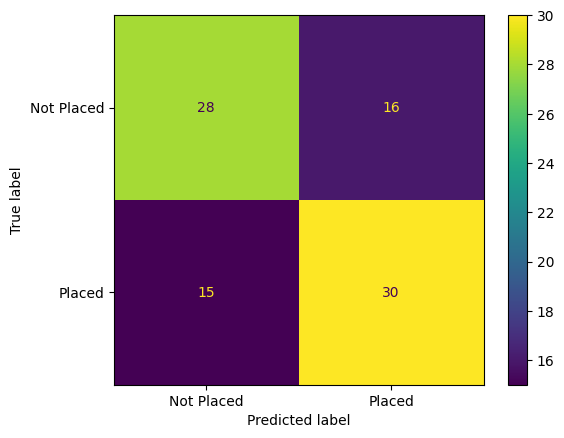

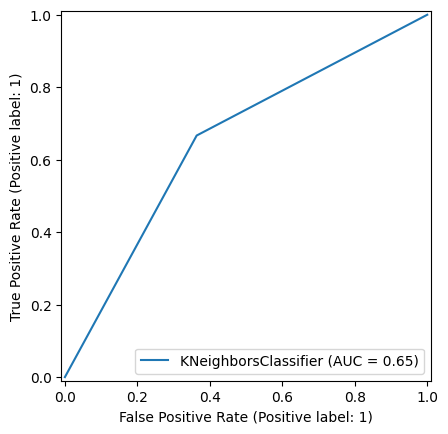

In [26]:
#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelKnn,X_test, Y_test)

# **Red Neuronal**
- Normalizar

In [35]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#EN ESTE CASO SE CONFIGURARON 2 CAPAS OCULTAS CON 10 NEURONAS, YA QUE INICIALMENTE SE CONFIGURO SOLO
#UNA CAPA OCULTA CON 5 NEURONAS Y NOS DIO UN F1-SCORE DEL 50% OSEA MALO.
modelNN = MLPClassifier(activation="relu",hidden_layer_sizes=(10,10), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados

MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.2, max_iter=500,
              momentum=0.3, random_state=3)

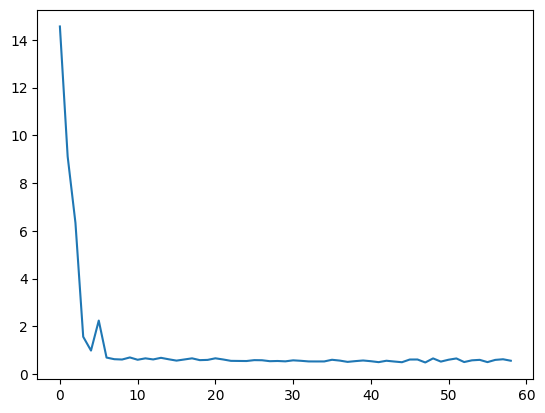

In [36]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

              precision    recall  f1-score   support

  Not Placed       0.73      0.73      0.73        44
      Placed       0.73      0.73      0.73        45

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



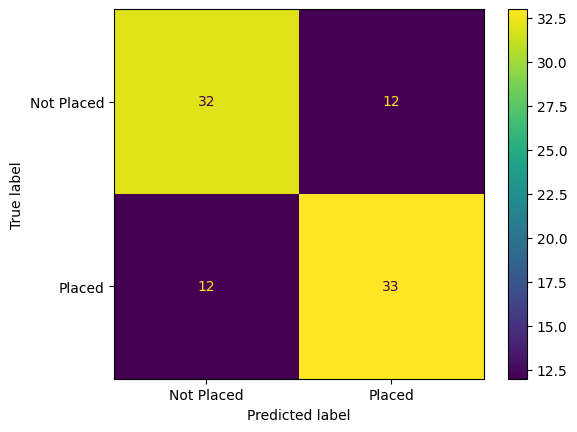

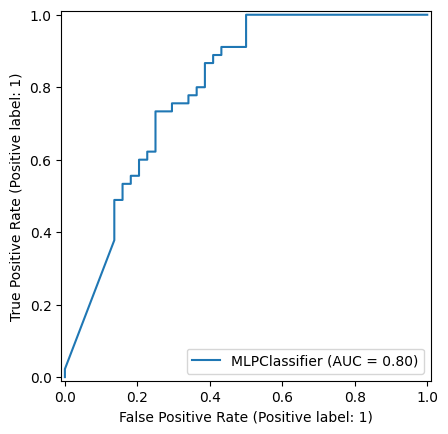

In [37]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelNN,X_test, Y_test)

# **SVM**
-Normalizar

In [38]:
#SVM
from sklearn.svm import SVC # SVR

modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

SVC(kernel='linear')

              precision    recall  f1-score   support

  Not Placed       0.88      0.82      0.85        44
      Placed       0.83      0.89      0.86        45

    accuracy                           0.85        89
   macro avg       0.86      0.85      0.85        89
weighted avg       0.86      0.85      0.85        89



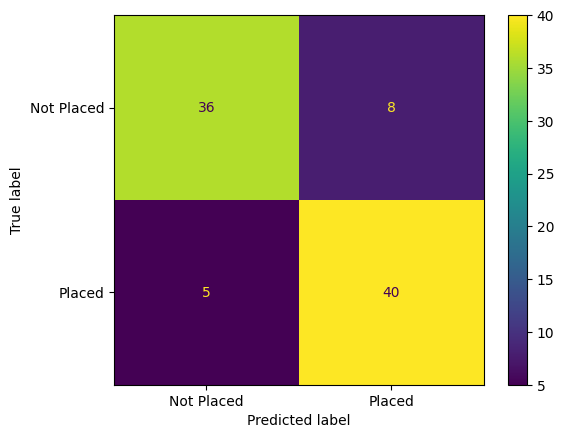

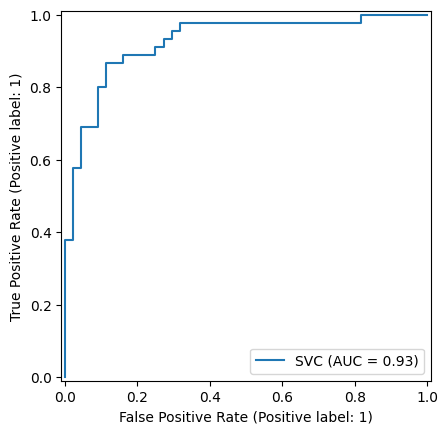

In [39]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelSVM,X_test, Y_test)

# **Conclusiones de los modelos:**

**Tree**

El modelo de Árbol de Decisión obtuvo una precisión del **76.4%**, lo que muestra un rendimiento bueno. Los valores de precisión, recall y F1-score estuvieron entre **0.73 y 0.80**, lo que indica un desempeño equilibrado en ambas clases. Sin embargo, la matriz de confusión evidenció varios falsos positivos y negativos, lo que significa que el modelo comete errores al clasificar correctamente algunos casos. La curva ROC mostró una capacidad moderada para distinguir entre las clases.  


---

**Random Forest**

El modelo de Random Forest alcanzó una precisión del **87.64%**, siendo uno de los mejores resultados obtenidos. Sus métricas de precisión, recall y F1-score fueron muy buenas (**alrededor de 0.86-0.87**). La matriz de confusión mostró pocos falsos positivos y negativos, y la curva ROC demostró una muy buena capacidad de distinguir entre las clases.  

Este modelo fue uno de los mejores y de los mas confiables, por lo que se considera una excelente opción para este conjunto de datos.

---

**KNN**

El modelo KNN obtuvo una precisión del **65.17%**, siendo el rendimiento más bajo entre todos los modelos. Las métricas de precisión, recall y F1-score rondaron el **0.65**, y la matriz de confusión mostró varios errores en las clasificaciones. La curva ROC también reflejó una baja capacidad para diferenciar las clases.  

**Conclusión:** Este modelo fue el menos efectivo, lo que sugiere que el método basado en distancias no se adapta bien a este tipo de datos.  

---

**Red Neuronal**

El modelo de Red Neuronal logró una precisión del **73.03%**, similar al Árbol de Decisión. Las métricas de desempeño (precisión, recall y F1-score) se mantuvieron cerca del **0.73** para ambas clases. En la matriz de confusión se observó un número considerable de falsos positivos y negativos. La curva ROC mostró una capacidad moderada para distinguir las clases.
Al inicio del modelo se habia configurado una capa oculta con 5 neuronas y dio un rendimiento del 50% (muy malo) por ende se configuraron dos capas, cada una de 10 neuronas y mejoro considerablemente el modelo, por lo que más iteraciones o otra configuración de los parametros podrían mejorar el resultado.  
  

---

**SVM (Máquinas de soporte vectorial)**

El modelo SVM obtuvo una precisión del **85.39%**, con valores de precisión, recall y F1-score entre **0.83 y 0.89**, lo que representa un excelente equilibrio. La matriz de confusión mostró pocos errores y la curva ROC evidenció una fuerte capacidad para diferenciar las clases.  

**Conclusión:** El SVM tuvo un rendimiento muy alto y comparable al de Random Forest, demostrando que los datos pueden separarse bien con un modelo lineal. Es una opción eficiente y precisa para este dataset.  


# 4. Hiperparametrización del mejor modelo con el 70%
Mejor modelo: Random Forest


In [40]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])

In [42]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Modelo base
model_rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True]
}


# Grid Search
grid = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    scoring='f1_macro',
    n_jobs=-1,
    cv=3,
    verbose=2
)

# Entrenar
grid.fit(X_train, Y_train)

# Mejor modelo y parámetros
best_rf = grid.best_estimator_
print("Mejor modelo Random Forest:", best_rf)
print("Mejores parámetros encontrados:", grid.best_params_)
print("Mejor F1-score promedio:", grid.best_score_)

# Guardar la métrica
medidas['Random Forest'] = grid.best_score_

# Mostrar todas las medidas
print(medidas)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Mejor modelo Random Forest: RandomForestClassifier(max_samples=0.7, min_samples_leaf=2, random_state=42)
Mejores parámetros encontrados: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mejor F1-score promedio: 0.8885016340999418
             Random Forest
f1 de la CV       0.888502


              precision    recall  f1-score   support

  Not Placed       0.84      0.86      0.85        44
      Placed       0.86      0.84      0.85        45

    accuracy                           0.85        89
   macro avg       0.85      0.85      0.85        89
weighted avg       0.85      0.85      0.85        89



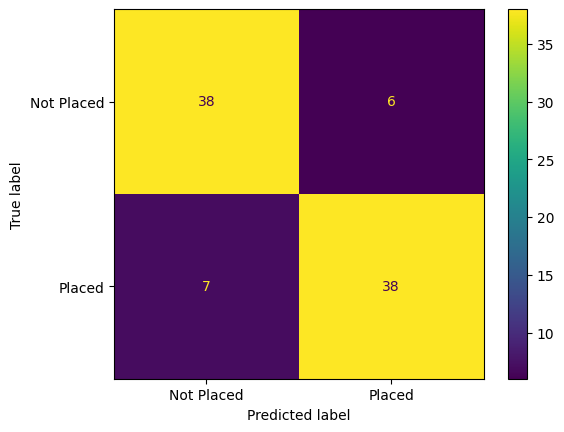

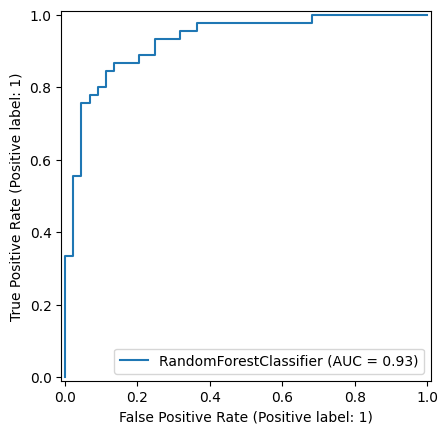

In [43]:
#Evaluación de Bagging
from sklearn import metrics

Y_pred = best_rf.predict(X_test)

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(best_rf,X_test, Y_test)

# **5. Guardado del modelo**

In [45]:
import pickle
filename = 'modelo-clas-hiper.pkl'
variables= X.columns._values
pickle.dump([best_rf,labelencoder,variables,scaler], open(filename, 'wb')) #write